# Data Pre-processing

In [0]:
#Jait Purohit

import sklearn.feature_extraction.text as sk_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from pandas import Series
%matplotlib inline
import json
import csv
import pandas as pd
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
import time
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import time
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [132]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
pip install geopandas

In [0]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/masters_project/train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/masters_project/test.csv")

In [136]:
type(train_data)

pandas.core.frame.DataFrame

In [137]:
train_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude
0,-200,-200,-200,-200,-200,-200,-200,-200,-114,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-28T16:14:07.247000+00:00',12,1.02,51.216736,4.412130
1,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-102,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-95,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-11-28T12:01:02.380000+00:00',7,0.57,51.232037,4.405185
2,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-106,-200,-200,-200,-200,-200,-97,-200,-84,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-14T09:05:22.832000+00:00',9,1.00,51.202763,4.390477
3,-200,-100,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-17T09:11:49.222000+00:00',12,0.62,51.194584,4.417887
4,-200,-106,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-10T14:47:01.379000+00:00',12,1.00,51.207203,4.403470


In [0]:
#train_data[train_data["'BS 1'"] >= '130']

train_trim_data = train_data[ train_data["'BS 1'"] >= -130 ]

In [160]:
train_trim_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude,geometry
6,-111,-108,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-29T08:27:42.256000+00:00',12,0.65,51.205639,4.418255,POINT (4.418254852 51.20563889)
8,-112,-200,-200,-200,-200,-200,-200,-200,-200,-90,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-17T04:56:43.537000+00:00',12,0.69,51.194309,4.418217,POINT (4.418216705 51.19430923)
14,-105,-103,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-13T22:54:29.543000+00:00',12,0.68,51.194344,4.418690,POINT (4.418690205 51.19434357)
15,-101,-95,-200,-200,-200,-200,-200,-200,-200,-90,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-09T23:42:19.191000+00:00',9,0.60,51.194046,4.418625,POINT (4.418624878 51.19404602)
26,-115,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-115,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-13T10:43:59.540000+00:00',11,0.72,51.201458,4.423762,POINT (4.423761845 51.20145798)


# Base Stations on Map

In [161]:
pip install geopandas

In [0]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [163]:
train_trim_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude,geometry
6,-111,-108,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-29T08:27:42.256000+00:00',12,0.65,51.205639,4.418255,POINT (4.418254852 51.20563889)
8,-112,-200,-200,-200,-200,-200,-200,-200,-200,-90,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-17T04:56:43.537000+00:00',12,0.69,51.194309,4.418217,POINT (4.418216705 51.19430923)
14,-105,-103,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-13T22:54:29.543000+00:00',12,0.68,51.194344,4.418690,POINT (4.418690205 51.19434357)
15,-101,-95,-200,-200,-200,-200,-200,-200,-200,-90,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-09T23:42:19.191000+00:00',9,0.60,51.194046,4.418625,POINT (4.418624878 51.19404602)
26,-115,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-115,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-13T10:43:59.540000+00:00',11,0.72,51.201458,4.423762,POINT (4.423761845 51.20145798)


In [0]:
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [165]:
crs = {'init': 'epsg:4326'}
train_trim_data.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude,geometry
6,-111,-108,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-29T08:27:42.256000+00:00',12,0.65,51.205639,4.418255,POINT (4.418254852 51.20563889)
8,-112,-200,-200,-200,-200,-200,-200,-200,-200,-90,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-17T04:56:43.537000+00:00',12,0.69,51.194309,4.418217,POINT (4.418216705 51.19430923)
14,-105,-103,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-13T22:54:29.543000+00:00',12,0.68,51.194344,4.418690,POINT (4.418690205 51.19434357)
15,-101,-95,-200,-200,-200,-200,-200,-200,-200,-90,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-09T23:42:19.191000+00:00',9,0.60,51.194046,4.418625,POINT (4.418624878 51.19404602)
26,-115,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-115,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-13T10:43:59.540000+00:00',11,0.72,51.201458,4.423762,POINT (4.423761845 51.20145798)


In [0]:
# Converting to (X,Y)
geometry = [Point(xy) for xy in zip(train_trim_data["Longitude"], train_trim_data["Latitude"])]

In [0]:
geo_df = gpd.GeoDataFrame(train_trim_data, crs = crs,geometry = geometry)

In [168]:
geo_df.head()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68',Time,'SF','HDOP',Latitude,Longitude,geometry
6,-111,-108,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-29T08:27:42.256000+00:00',12,0.65,51.205639,4.418255,POINT (4.418254852 51.20563889)
8,-112,-200,-200,-200,-200,-200,-200,-200,-200,-90,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-17T04:56:43.537000+00:00',12,0.69,51.194309,4.418217,POINT (4.418216705 51.19430923)
14,-105,-103,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-13T22:54:29.543000+00:00',12,0.68,51.194344,4.418690,POINT (4.418690205 51.19434357)
15,-101,-95,-200,-200,-200,-200,-200,-200,-200,-90,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2018-01-09T23:42:19.191000+00:00',9,0.60,51.194046,4.418625,POINT (4.418624878 51.19404602)
26,-115,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-115,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,'2017-12-13T10:43:59.540000+00:00',11,0.72,51.201458,4.423762,POINT (4.423761845 51.20145798)


In [0]:
geo_df.drop(columns=['Time'],inplace=True)

In [0]:
geo_train = geo_df.sample(n = 1000)

In [171]:
geo_train.shape

(1000, 73)

In [172]:
pip install folium

In [173]:
#Part 1
# Let's change the basemap style to 'Stamen Toner'
import folium
m = folium.Map(location=[51.216736, 4.412130], tiles='Stamen Toner',
                zoom_start=12, control_scale=True, prefer_canvas=True)

m

In [174]:
# Create a Map instance
m = folium.Map(location=[51.216736, 4.412130],
    zoom_start=12, control_scale=True)

# Add marker
# Run: help(folium.Icon) for more info about icons
folium.Marker(
    location=[51.216736, 4.412130],
    popup='Antwerp City Hall',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)

In [0]:
points_gjson = folium.features.GeoJson(geo_train, name = "Base stations")

In [176]:
# Create a Map instance
m = folium.Map(location=[51.216736, 4.412130], tiles = 'cartodbpositron', zoom_start=14, control_scale=True)

# Add points to the map instance
points_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
#m.add_child(points_gjson)

#Show map
m

In [177]:
pip install mplleaflet

In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet

In [0]:
# 1.Plot data:
geo_train.plot()

# 2. Convert plot to a web map:
mplleaflet.show()

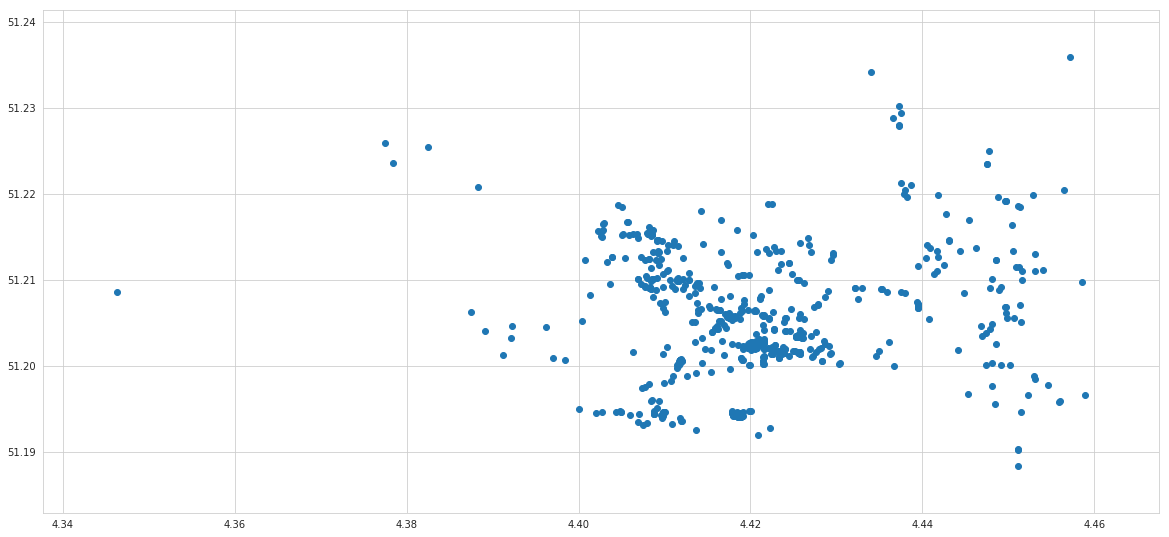

In [180]:
# 1. Plot data:
geo_train.plot(figsize=(20,20));

# Other Parameters EDA

count    20533.000000
mean        11.240491
std          1.158878
min          7.000000
25%         11.000000
50%         12.000000
75%         12.000000
max         12.000000
Name: 'SF', dtype: float64


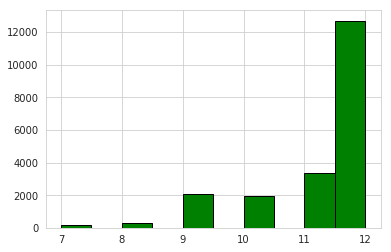

In [181]:
histNONA(train_trim_data, "'SF'")

count    20533.000000
mean         0.756044
std          0.515615
min          0.510000
25%          0.640000
50%          0.690000
75%          0.770000
max         55.420002
Name: 'HDOP', dtype: float64


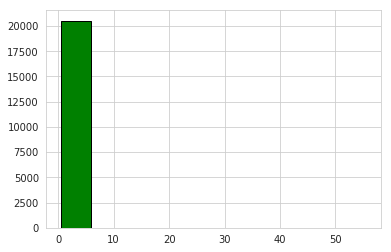

In [182]:
histNONA(train_trim_data, "'HDOP'")

count    20533.000000
mean      -108.762334
std          5.979396
min       -119.000000
25%       -113.000000
50%       -110.000000
75%       -106.000000
max        -58.000000
Name: 'BS 1', dtype: float64


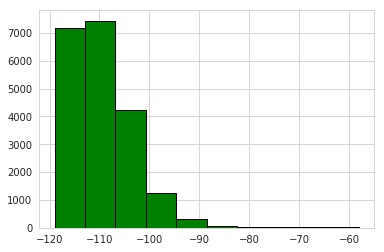

In [183]:
histNONA(train_trim_data, "'BS 1'")

In [184]:
train_trim_data.describe()

,'BS 1','BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude
count,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.0,20533.00000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.0,20533.000000,20533.000000,20533.000000,20533.0,20533.0,20533.000000,20533.0,20533.0,20533.0,20533.0,20533.0,20533.000000,20533.000000,20533.000000,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.0,20533.000000,20533.000000,20533.000000,20533.000000
mean,-108.762334,-137.104953,-182.865241,-199.798958,-199.676862,-199.918132,-194.603711,-196.303658,-196.623728,-166.566454,-197.228072,-197.533775,-199.321239,-185.744996,-198.900794,-199.978717,-177.123655,-191.748308,-198.574782,-199.718551,-199.995276,-199.960600,-199.574441,-200.0,-198.88219,-199.665855,-196.743096,-199.990893,-199.908830,-199.995325,-199.619685,-199.709200,-199.991575,-199.974772,-199.458968,-199.953197,-199.569035,-199.981834,-199.620708,-199.798179,-199.848488,-200.0,-199.974724,-199.983441,-199.990649,-200.0,-200.0,-199.823358,-200.0,-200.0,-200.0,-200.0,-200.0,-199.995860,-199.983149,-199.968928,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,11.240491,0.756044,51.202184,4.420834
std,5.979396,47.405608,36.639594,4.210063,5.419617,2.692152,21.555412,18.209107,17.299269,48.839732,15.675216,14.752431,7.858458,33.394803,9.858088,1.364036,39.414788,26.326922,11.064421,4.999428,0.676933,1.884306,6.117531,0.0,9.90405,5.766575,16.598726,0.922881,2.855243,0.669954,5.803487,4.975023,0.853807,1.476370,7.320888,2.025577,6.164198,1.301893,6.032923,4.266815,3.734985,0.0,1.478594,1.186331,0.948257,0.0,0.0,3.862218,0.0,0.0,0.0,0.0,0.0,0.593188,1.207245,1.818474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.158878,0.515615,0.007630,0.011483
min,-119.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.0,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,-200.0,-200.0,-200.000000,-200.0,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.000000,-200.000000,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,7.000000,0.510000,51.186298,4.329908
25%,-113.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.0,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.0,-200.000000,-200.000000,-200.000000,-

# Split Training and Testing data

In [198]:
traincols = train_trim_data.columns.tolist() 
traincols.remove("'BS 1'")
len(traincols)

73

In [0]:
columns_X = traincols
X = train_trim_data[columns_X]
columns_y = ["'BS 1'"]
y = train_trim_data[columns_y]

In [0]:
y["'BS 1'"] = y["'BS 1'"].astype(float)

In [201]:
y["'BS 1'"].dtype

dtype('float64')

In [0]:
X.drop(columns=['Time'],inplace=True)
X.drop(columns=['geometry'],inplace=True)

In [206]:
X.head()

,'BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude
6,-108,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-113,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.65,51.205639,4.418255
8,-200,-200,-200,-200,-200,-200,-200,-200,-90,-109,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.69,51.194309,4.418217
14,-103,-200,-200,-200,-200,-200,-200,-200,-87,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.68,51.194344,4.418690
15,-95,-200,-200,-200,-200,-200,-200,-200,-90,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,9,0.60,51.194046,4.418625
26,-114,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-115,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,11,0.72,51.201458,4.423762


In [207]:
y.head()

,'BS 1'
6,-111.0
8,-112.0
14,-105.0
15,-101.0
26,-115.0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
print ('X: ({}, {})'.format(*X.shape))
print ('y: ({}, {})'.format(*y.shape))
print ('X_train: ({}, {})'.format(*X_train.shape))
print ('y_train: ({}, {})'.format(*y_train.shape))
print ('X_test: ({}, {})'.format(*X_test.shape))
print ('y_test: ({}, {})'.format(*y_test.shape))

X: (20533, 71)
y: (20533, 1)
X_train: (16426, 71)
y_train: (16426, 1)
X_test: (4107, 71)
y_test: (4107, 1)


In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
def print_report(y_pred,y_true):
    print("Accuracy: ", metrics.accuracy_score(y_true,y_pred))
    print("Precision: ", metrics.precision_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("Recall: ", metrics.recall_score(y_true,y_pred, pos_label=1, average='weighted'))
    print("F1_Score: ", metrics.f1_score(y_true,y_pred, pos_label=1, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    outcome = encode_text_index(train_data, y)
    print('Plotting confusion matrix')
    plt.figure()
    plot_confusion_matrix(cm, outcome)
    plt.show()
    print(classification_report(y_true, y_pred))

# Model Classifiers - KNN, Linear Regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Grid Search Cross Validation¶
Grid Search CV implements an exhaustive search over specified parameter values for an estimator. Important members are fit, predict.

It iterates through a dictionary of hyper parameters and choose the combination that better fits the model.

In [0]:
# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

## KNN

In [214]:
# Create a k-Nearest Neighbors Regression estimator
knn_estimator = KNeighborsRegressor()
knn_parameters = {"n_neighbors": [1,2,5]}
knn_best = cv_optimize(knn_estimator, knn_parameters, X_train, y_train, score_func='neg_mean_squared_error')

BEST {'n_neighbors': 5} -30.177489346158534 {'mean_fit_time': array([0.214188  , 0.22357197, 0.22475348]), 'std_fit_time': array([0.02181705, 0.02452401, 0.02597044]), 'mean_score_time': array([1.22868409, 1.40857024, 1.55228834]), 'std_score_time': array([0.28952935, 0.26363764, 0.28701112]), 'param_n_neighbors': masked_array(data=[1, 2, 5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 5}], 'split0_test_score': array([-49.19446135, -37.63032562, -29.94141205]), 'split1_test_score': array([-49.6718417 , -37.07709285, -30.69976256]), 'split2_test_score': array([-50.83196347, -39.31354642, -31.22979604]), 'split3_test_score': array([-47.0651446 , -36.31133942, -29.10643531]), 'split4_test_score': array([-50.97138508, -39.02496195, -29.91011263]), 'mean_test_score': array([-49.54693778, -37.87143857, -30.17748935]), 'std_test_score': array([1.41272145, 1.1430609 , 0.72860876]),

In [215]:
knn_reg=knn_best.fit(X_train, y_train)
knn_training_accuracy = knn_reg.score(X_train, y_train)
knn_test_accuracy = knn_reg.score(X_test, y_test)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.8f" % (knn_training_accuracy))
print ("R^2 on test data:     %0.8f" % (knn_test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.44763864
R^2 on test data:     0.17750986


In [0]:
# Calculate the Root Mean Squared Error
RMSE = np.sqrt(mean_squared_error(knn_reg.predict(X_test),y_test))

In [219]:
print(RMSE)

5.22920289731807


## Linear Regression

In [220]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[11592.19270655]
[[ 3.15615140e-02  4.90181761e-02  6.96335500e-02  9.29218276e-02
   5.48526670e-02  3.41339364e-02  3.54108563e-02  3.27734020e-02
   8.24200099e-03  3.63850022e-02  5.67157260e-02  5.78938662e-02
   5.01190857e-02  4.61482085e-02  7.33807512e-02  4.49794339e-02
   3.99916121e-02  6.39831259e-02  8.17824817e-02  9.99140215e-11
   3.44202253e-02  4.68702025e-02  1.67790226e-11  6.27733504e-02
   4.25329250e-02  4.68965353e-02  8.54489930e-02  1.20747079e-01
   1.34554338e-01  3.84673510e-02  5.24736364e-02  1.05318946e-01
   5.22603484e-02  6.10998850e-02  6.63345828e-02  4.07110715e-02
   3.96844173e-02  3.09748650e-02  4.48719939e-02  1.99712034e-03
  -1.00541797e-12  2.86505363e-02  7.24985020e-02  7.64003365e-02
   2.01261230e-12  7.94386779e-12  1.29408840e-01 -4.83169060e-13
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.56273011e-02  1.92669230e-01  3.11348673e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.000000

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

Root mean squared error = 5.3476
R-squared = 0.1398


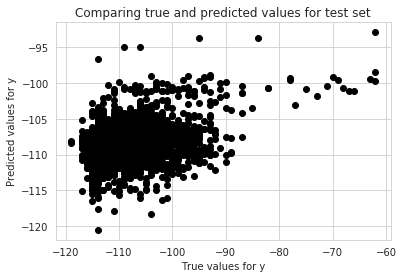

In [227]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

## Save Model

In [240]:
sampleValue = pd.DataFrame(train_trim_data, columns=(columns_X + columns_y))
sampleValue = sampleValue.sample(10)
sampleValue.drop(columns=['Time','geometry'],inplace=True)
sampleValue

,'BS 2','BS 3','BS 4','BS 5','BS 6','BS 7','BS 8','BS 9','BS 10','BS 11','BS 12','BS 13','BS 14','BS 15','BS 16','BS 17','BS 18','BS 19','BS 20','BS 21','BS 22','BS 23','BS 24','BS 25','BS 26','BS 27','BS 28','BS 29','BS 30','BS 31','BS 32','BS 33','BS 34','BS 35','BS 36','BS 37','BS 38','BS 39','BS 40','BS 41','BS 42','BS 43','BS 44','BS 45','BS 46','BS 47','BS 48','BS 49','BS 50','BS 51','BS 52','BS 53','BS 54','BS 55','BS 56','BS 57','BS 58','BS 59','BS 60','BS 61','BS 62','BS 63','BS 64','BS 65','BS 66','BS 67','BS 68','SF','HDOP',Latitude,Longitude,'BS 1'
85975,-107,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-115,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,11,0.72,51.200420,4.411773,-114
11962,-100,-200,-200,-200,-200,-200,-200,-200,-96,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.70,51.194324,4.418678,-113
25359,-107,-101,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.71,51.203358,4.425355,-96
74413,-96,-200,-200,-200,-200,-200,-200,-200,-99,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.68,51.194324,4.418573,-109
47662,-200,-200,-200,-200,-200,-200,-108,-200,-200,-200,-200,-200,-200,-200,-200,-112,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.61,51.212147,4.451159,-103
72052,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-108,-200,-200,-200,-106,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,10,0.70,51.214581,4.409162,-113
44941,-92,-200,-200,-200,-200,-200,-200,-200,-103,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.63,51.194393,4.418591,-111
26299,-94,-200,-200,-200,-200,-200,-200,-200,-99,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.73,51.194359,4.418549,-108
36764,-200,-200,-200,-200,-200,-200,-200,-200,-84,-200,-200,-200,-112,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,12,0.60,51.194378,4.418598,-113
4090,-110,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-111

In [241]:
y_pred1 = knn_reg.predict(sampleValue.iloc[:,1:])
y_pred1

array([[-109.2],
       [-112.4],
       [-108.6],
       [-112.4],
       [-107.4],
       [-104. ],
       [-113.8],
       [-112.4],
       [-109.4],
       [-111.4]])

In [242]:
y_pred1.shape

(10, 1)

In [243]:
# Save the model
from sklearn.externals import joblib
joblib.dump(knn_reg, 'knn_model.pkl')

['knn_model.pkl']

# Load saved model to predict Test Data

In [266]:
#Loading the saved model with joblib
pipe = joblib.load('knn_model.pkl')

# New data to predict
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/masters_project/test.csv')
test_data.drop(columns=['Time'],inplace=True)
test_trim_data = test_data[ test_data["'BS 1'"] >= -130 ]
pred_cols = list(test_trim_data.columns.values)[1:]

# apply the whole pipeline to data
pred = pd.DataFrame(pipe.predict(test_trim_data[pred_cols]))
pred.rename(columns={0 : 'Predicted_RSSI'}, inplace=True)
pred

,Predicted_RSSI
0,-108.2
1,-111.6
2,-113.2
3,-111.2
4,-111.8
5,-113.0
6,-107.6
7,-113.6
8,-112.4
9,-109.4


In [0]:
test_y_actual=test_trim_data[["'BS 1'"]]
test_y_actual.head(100)
test_y_latlong = test_trim_data[['Latitude', 'Longitude']]

In [0]:
df_test = test_y_actual.join(test_y_latlong)

# Matrix for BS-1

In [269]:
df_test.join(pred)

,'BS 1',Latitude,Longitude,Predicted_RSSI
5,-97,51.194382,4.418537,-113.0
8,-114,51.200665,4.411805,-112.4
15,-114,51.194359,4.418555,-110.4
16,-114,51.194328,4.418320,-106.2
17,-91,51.203358,4.425312,-107.2
18,-113,51.194454,4.418630,-111.0
20,-106,51.193947,4.411707,-106.2
21,-114,51.194141,4.418617,-107.4
25,-111,51.196415,4.408262,-109.2
29,-106,51.215954,4.404132,-107.2


In [270]:
test_y_actual.shape

(7492, 1)